In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()       # Will prompt you to select a file

Saving data.csv to data.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['data.csv'])) # Dataset is now stored in a Pandas Dataframe

# Exploratory Data Analysis

In [ ]:
print("There are", data.shape[0], "rows and", data.shape[1], "columns in the dataset.")

There are 569 rows and 33 columns in the dataset.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The last column in the dataset contains all NA values, and so we remove it.

## Cleaning Data

In [ ]:
data = data.drop(['Unnamed: 32'], axis = 1)
print("After data cleaning, there are", data.shape[0], "observations and", data.shape[1], "features in the dataset.")

After data cleaning, there are 569 observations and 32 features in the dataset.


In [ ]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [ ]:
data.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

There are no features that contains NA values.


## Numerical Features: Descriptive Statistics

In [ ]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

## Categorical Features: Descriptive Statistics

In [ ]:
data.describe(include = 'O')

diagnosis
count        569
unique         2
top            B
freq         357

## Feature Design

Getting features that have moderate to high correlation with Diagnosis. Then assigning it to new dataframe.


## Data Visualization


Selecting the mean features, since the other features are related.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express
import seaborn
seaborn.set() 

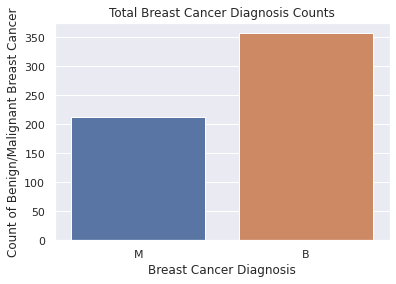

In [ ]:
sns.countplot(data,x="diagnosis")

plt.xlabel("Breast Cancer Diagnosis")
plt.ylabel("Count of Benign/Malignant Breast Cancer")
plt.title("Total Breast Cancer Diagnosis Counts")

plt.show()

## Feature Scaling

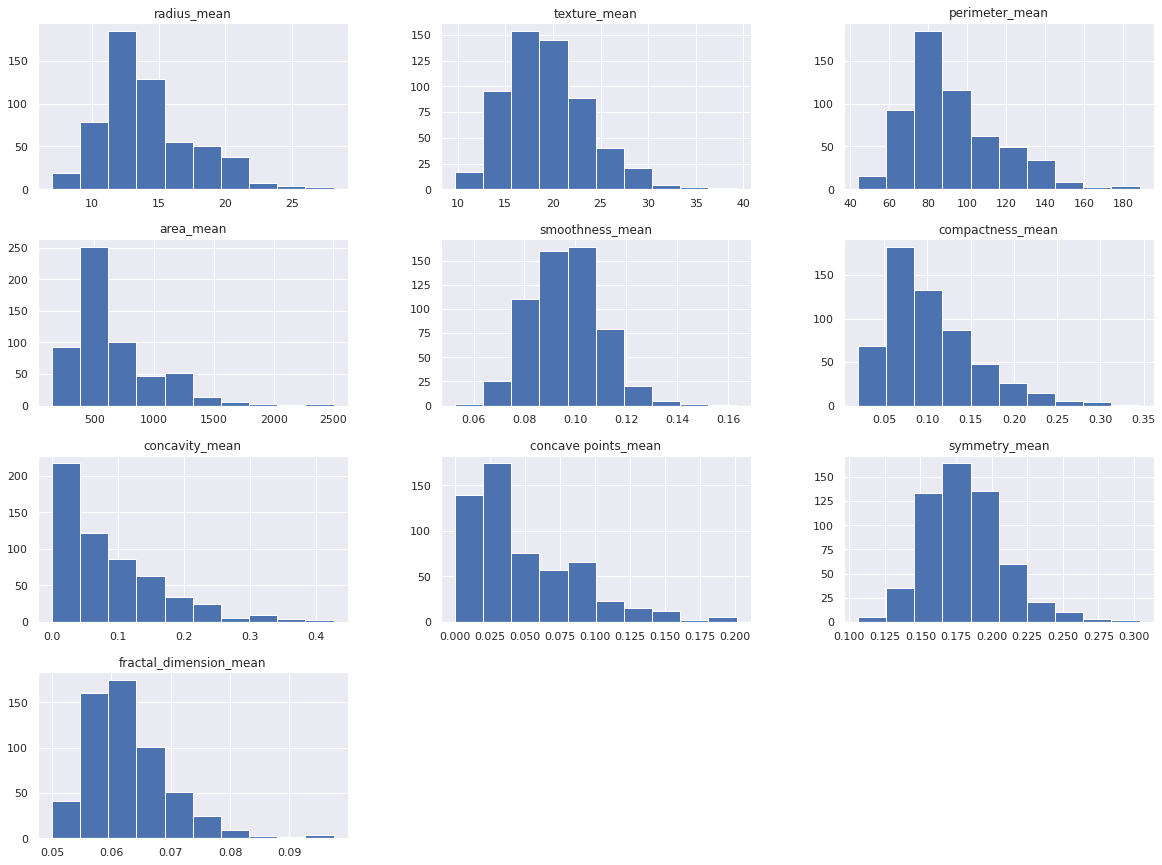

In [ ]:
X = data.iloc[:, 2:12]
X.hist(figsize=(20, 15));

Most of the distributions are right-skewed, which indicates that not all features follow a standard normal distribution (mean=0, variance=1), which would present itself as a bell-shaped curve. Their scales also vary, which may cause features with higher scales/magnitudes  contributing more to the model training process. However, we want to ensure that all features are contributing equally to the model training process.

Feature scaling refers to the process of transforming the values of the features to a similar scale. This process is necessary for our SVM model, which is distance-based, so that features with high magnitudes do not dominate the distance calculations. 

In [ ]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler

In [ ]:
mean_data = data.iloc[:, 2:12] # Each observation has 10 means corresponding to 10 main features (i.e. radius, texture, smoothness, etc.)

# STANDARDIZING MEAN
mapper = DataFrameMapper([(mean_data.columns, StandardScaler())])
scaled_features = mapper.fit_transform(mean_data.copy(), 10)
scaled_features_df = pd.DataFrame(scaled_features, index=mean_data.index, columns=mean_data.columns)

print(scaled_features_df.head(5))   

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  
0                2.255747  
1               -0.868652  
2       

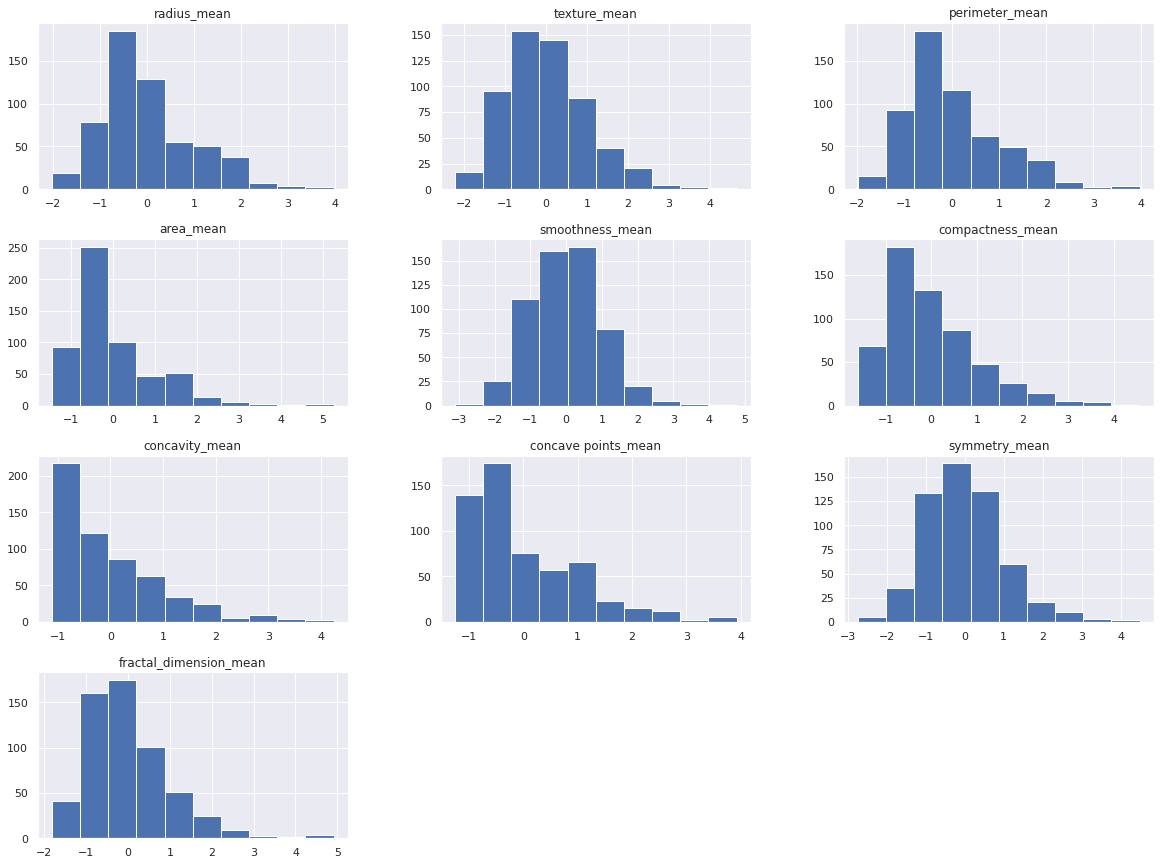

In [ ]:
scaled_features_df.hist(figsize=(20, 15));

In [ ]:
scaled_features_df  = pd.concat([data.iloc[:,0:2], scaled_features_df.iloc[:,:]], axis=1) # concatenate id, diagnosis with standardized means
scaled_features_df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M     1.097064     -2.073335        1.269934   0.984375   
1      842517         M     1.829821     -0.353632        1.685955   1.908708   
2    84300903         M     1.579888      0.456187        1.566503   1.558884   
3    84348301         M    -0.768909      0.253732       -0.592687  -0.764464   
4    84358402         M     1.750297     -1.151816        1.776573   1.826229   
..        ...       ...          ...           ...             ...        ...   
564    926424         M     2.110995      0.721473        2.060786   2.343856   
565    926682         M     1.704854      2.085134        1.615931   1.723842   
566    926954         M     0.702284      2.045574        0.672676   0.577953   
567    927241         M     1.838341      2.336457        1.982524   1.735218   
568     92751         B    -1.808401      1.221792       -1.814389  -1.347789   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           1.568466          3.283515        2.652874             2.532475   
1          -0.826962         -0.487072       -0.023846             0.548144   
2           0.942210          1.052926        1.363478             2.037231   
3           3.283553          3.402909        1.915897             1.451707   
4           0.280372          0.539340        1.371011             1.428493   
..               ...               ...             ...                  ...   
564         1.041842          0.219060        1.947285             2.320965   
565         0.102458         -0.017833        0.693043             1.263669   
566        -0.840484         -0.038680        0.046588             0.105777   
567         1.525767          3.272144        3.296944             2.658866   
568        -3.112085         -1.150752       -1.114873            -1.261820   

     symmetry_mean  fractal_dimension_mean  
0         2.217515                2.255747  
1         0.001392               -0.868652  
2         0.939685               -0.398008  
3         2.867383                4.910919  
4        -0.009560               -0.562450  
..             ...                     ...  
564      -0.312589               -0.931027  
565      -0.217664               -1.058611  
566      -0.809117               -0.895587  
567       2.137194                1.043695  
568      -0.820070               -0.561032  

[569 rows x 12 columns]

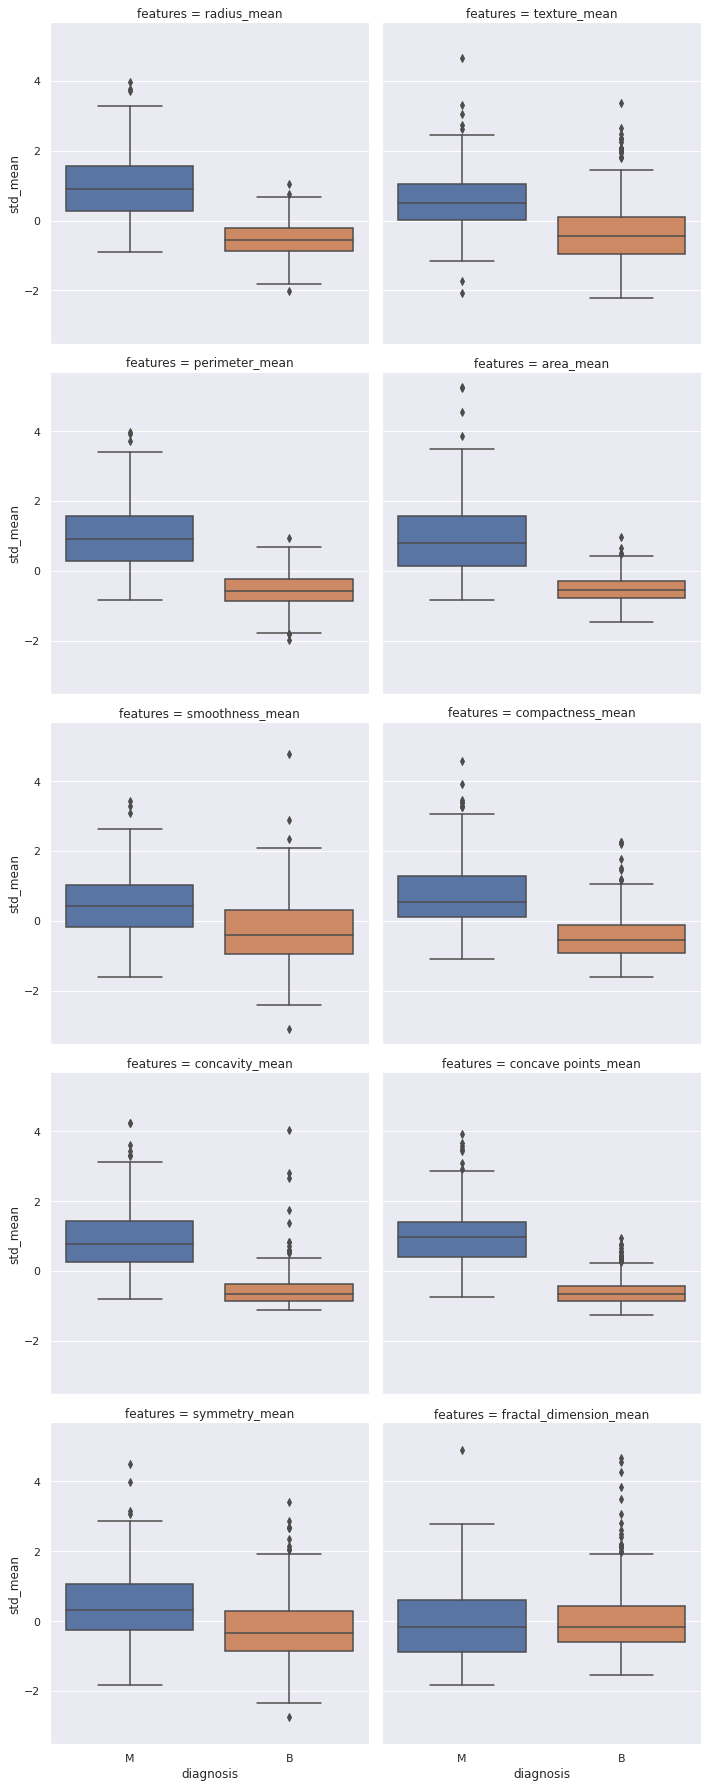

In [ ]:
# Convert Standardized Data Frame from Wide Format to Long Format
data_melt = pd.melt(scaled_features_df, id_vars = ["id", "diagnosis"], var_name = "features", value_name = "std_mean")
data_melt.head(5)


# Boxplot for Each Main Feature Mean (i.e. radius_mean, texture_mean, smoothness_mean, etc.)
g = sns.catplot(data= data_melt, x = 'diagnosis', y = 'std_mean', col = 'features', kind = 'box', col_wrap = 2)  

After feature scaling using standardization, each boxplot of the mean features are scaled to have zero mean and unit variance, mitigating the effects of features with extreme values, which can affect the model's performance.

[]

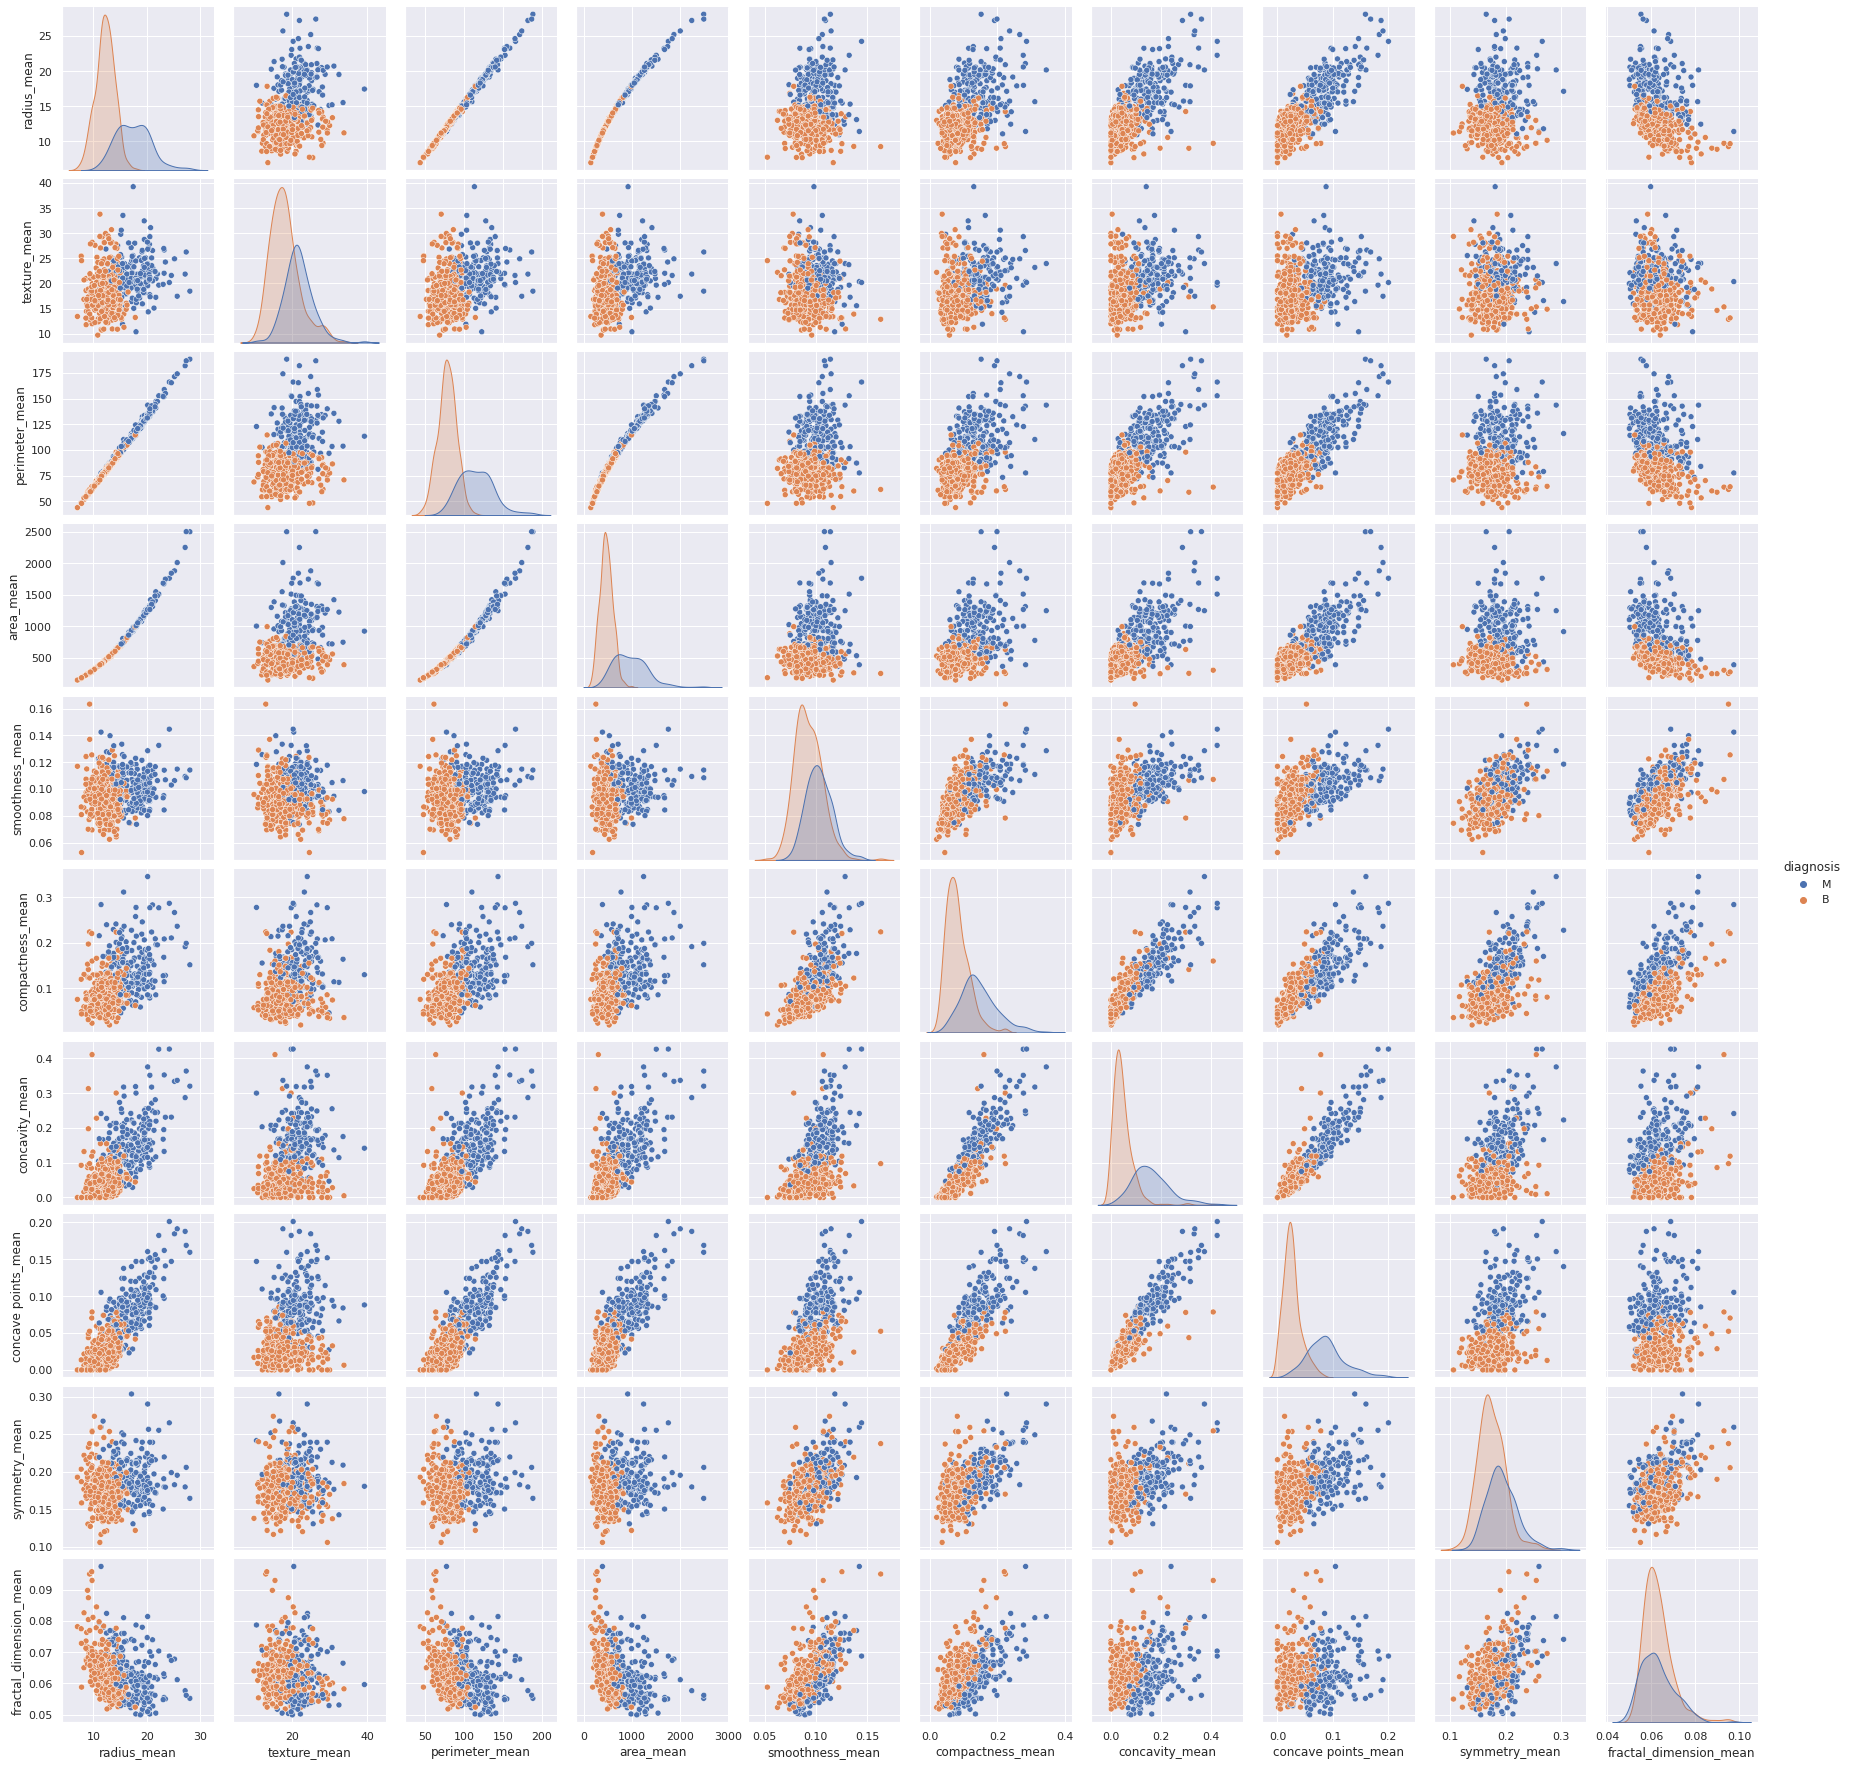

In [ ]:
temp = pd.concat([data.iloc[:,1], mean_data.iloc[:,:]], axis=1)
sns.pairplot(temp, hue="diagnosis")
plt.plot()

From the pairplot, strong linear positive correlations are seen between the features, such as perimeter mean and radius mean, suggesting that the model can be affected negatively. There may be overfitting, unstable or inaccurate model coefficients, and become more difficult to interpret feature importance. 

To counter this, SVM will include principle component analysis, which can mitigate issues by utilizing dimensionality reduction, improving our performance accuracy and generalization when comparing our model to the test data. Since the data is relatively small, PCA is not necessarily needed, but is good practice. 

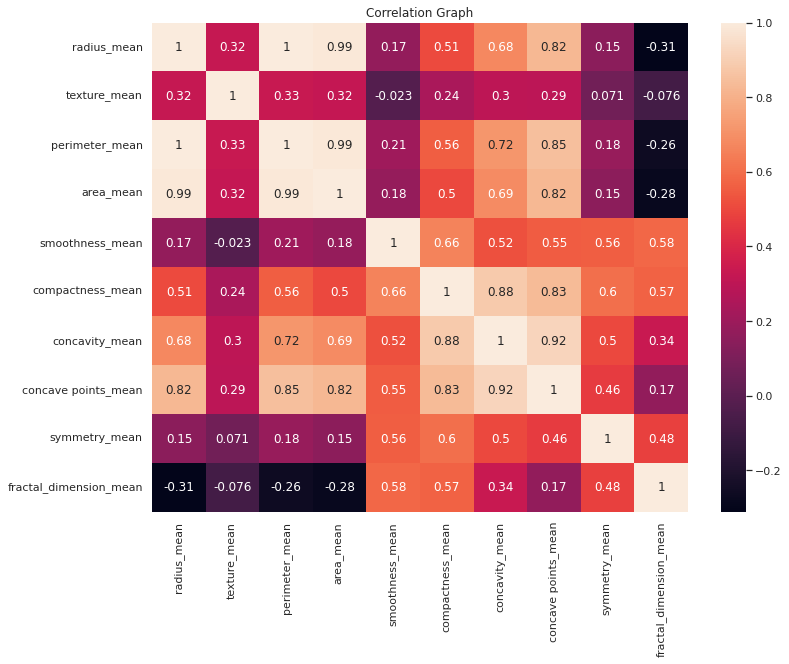

In [ ]:
plt.figure(figsize=(12, 9))

plt.title("Correlation Graph")
cols = list(mean_data.columns)
# print(cols)

sns.heatmap(data[cols].corr(), annot=True);

## Feature Design

Transforming categorical diagnosis feature into 0/1 to prepare for modeling.

In [ ]:
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis']) 
data['diagnosis'].head()

# Reassign Numerical Labels to Diagnosis Column
data['diagnosis']= label_encoder.fit_transform(data['diagnosis'])

data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

## Model Exploration

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data to train and test the model (.8,.2) --> 80% assigned to train, 20% assigned to validate/test
mean_features = data.iloc[:, 1:12]

X = mean_features.drop(['diagnosis'], axis=1)
Y = mean_features['diagnosis']

Xtr, Xva, Ytr, Yva = train_test_split(X, Y, test_size = 0.2, random_state=10)

## SVM

Note, code with all outputs in personal "copy"

In [ ]:
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

####Feature Scaling for SVM

In [ ]:
# Perform feature scaling on the training data . Train the machine learning model on the scaled training data.
scaler = StandardScaler()  
Xtr =  scaler.fit_transform(Xtr)

# Use the same scaling transformation to transform the testing data.
Xva = scaler.transform(Xva)
# Evaluate the performance of the model on the scaled testing data.

####Model

Our model will include a soft margin classifier, since we want more robustness in regards to outliers and handle possible non-linear separable data. 

Here, choosing linear kernel SVM for linearly separable data first, seeing that the training set is very large/has plenty of features. We will utilize the hinge loss function with the linear kernel svm for regularization.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from sklearn.svm import LinearSVC

cancer = LinearSVC(loss='hinge', dual=True)

cancer = svm.SVC(kernel='linear', C = 0.05) # Linear Kernel w/ parameter
#Train model
cancer.fit(Xtr, Ytr)

#Predict response 
X_pred_train = cancer.predict(Xtr)
X_pred_test = cancer.predict(Xva)

# Model Accuracy
train_score = metrics.accuracy_score(Ytr, X_pred_train)*100
test_score = metrics.accuracy_score(Yva, X_pred_test)*100

print(cancer)
print("Train Accuracy:",round(train_score,2),"%")
print("Test Accuracy:",round(test_score,2),"%")

#### Hypertuning and Cross Validation

Since random hyperparameters were utilized, we would like to optimize them to improve model performance and accuracy. For imbalanced data, we would utilize a class-weighted SVM, gives different weights to both the majority and minority classes and the classification of the classes will be influenced during the training phase. This would penalize the misclassification made by the minority class by setting a higher class weight and at the same time reducing weight for the majority class.

In [ ]:
kernels = ['linear', 'poly', 'rbf']
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
gamma_values = [0.001, 0.01, 0.1, 1, 10, 100]

best_model = None
best_kernel = None
best_score = 0

for kernel in kernels:
  for C in C_values:
        for gamma in gamma_values:
            svc = svm.SVC(kernel=kernel, class_weight='balanced', C=C, gamma=gamma,probability=True)
            svc.fit(Xtr, Ytr)
            y_pred_val = svc.predict(Xva)
            score = metrics.accuracy_score(Yva, y_pred_val)*100
            if score > best_score:
                best_model = svc
                best_kernel = kernel
                best_score = score

# Evaluate the best model on the test set
y_pred_test = best_model.predict(Xva)
test_score = metrics.accuracy_score(Yva, y_pred_test)*100

print("Best model with hyperparameters:")
print(best_model)
print("Kernel:", best_kernel)
print("Validation accuracy:", round(best_score, 2), "%")
print("Test accuracy:", round(test_score, 2), "%")


# Evaluate the best model on the test set
y_pred_test = best_model.predict(Xva)
test_score = metrics.accuracy_score(Yva, y_pred_test)*100

print("Best model with hyperparameters:")
print(best_model)
print("Kernel:", best_kernel)
# print("Validation accuracy:", round(best_score, 2), "%")
# print("Test accuracy:", round(test_score, 2), "%")

svm_best = best_model
svm_best.fit(Xtr, Ytr)

y_pred_svm = svm_best.predict(Xva)

svm_cm = confusion_matrix(Yva,y_pred_svm)
print("Confusion Matrix generated from best svm model with optimal hyperparameters:")
print(confusion_matrix(Yva,y_pred_svm),"\n")
print("Classification Report")
print(classification_report(Yva,X_pred_test))

# Recall: Model's ability to correctly detect positive (malignant) cases. --> Out of the positive class, how many did I predict were positive?
## num true positive / (num true positive) + (num false negative)
recall = recall_score(Yva, y_pred_svm)
print("\n Recall Score on test data, using best svm model with optimal hyperparameters: {:.2f}".format(recall))
print("Out of all the malignant tumors in the dataset, {:.2f}% of them were classified as malignant by the model.".format(recall*100))

# Precision: Accuracy of the model's positive predictions --> Out of the positive predictions, how many were actually positive?
## num true positive / (num true positive) + (num false positive)
precision = precision_score(Yva, y_pred_svm)
print("\n Precision Score on test data, using best svm model with optimal hyperparameters: {:.2f}".format(precision))
print("Out of the tumors that the model classified as malignant, {:.2f}% of them were actually malignant.".format(precision*100))

# Accuracy: Proportion of Correctly Predicted Cases (Class 0 & Class 1) = (num true positive + num true negative) / total number of predictions
accuracy = svm_best.score(Xva, Yva)
print("\n Accuracy on test data, using best svm model with optimal hyperparameters: {:.2f}".format(accuracy))
print("Out of all the tumors in the dataset, {:.2f}% of them were actually correctly classified by the model.".format(accuracy*100))

In [ ]:
import time
kernels = ['linear', 'poly', 'rbf']
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
gamma_values = [0.001, 0.01, 0.1, 1, 10, 100]

best_model = None
best_kernel = None
best_score = 0

starttime= time.process_time()

for kernel in kernels:
  for C in C_values:
        for gamma in gamma_values:
            svc = svm.SVC(kernel=kernel, class_weight='balanced', C=C, gamma=gamma,probability=True)
            svc.fit(Xtr, Ytr)
            y_pred_val = svc.predict(Xva)
            score = metrics.accuracy_score(Yva, y_pred_val)*100
            if score > best_score:
                best_model = svc
                best_kernel = kernel
                best_score = score     #got the best hyperparameters/model from training and then also tested with test data

# Evaluate the best model on the test set (overall)
y_pred_test = best_model.predict(Xva) #insert X test set in our best model to get y_pred
test_score = metrics.accuracy_score(Yva, y_pred_test)*100

print("Best parameters:",best_model)
print("Kernel:", best_kernel)
# print("Validation accuracy:", round(best_score, 2), "%")
# print("Test accuracy:", round(test_score, 2), "%")


# Evaluate the best model on the test set
y_pred_test = best_model.predict(Xva)
test_score = metrics.accuracy_score(Yva, y_pred_test)*100

svm_best = best_model
svm_best.fit(Xtr, Ytr)

y_pred_svm = svm_best.predict(Xva)

endtime= time.process_time()

totaltime= endtime- starttime
print(f"Total time taken by 5-fold Cross Validation with SVM is" ,(totaltime),'seconds')
print("Average Perfomance Measure of SVM Model using General Cross Validation")
# svm_cm = confusion_matrix(Yva,y_pred_svm)
# print("Confusion Matrix generated from best svm model with optimal hyperparameters:")
# print(confusion_matrix(Yva,y_pred_svm),"\n")
print("Classification Report")
print(classification_report(Yva,y_pred_svm))

# Recall: Model's ability to correctly detect positive (malignant) cases. --> Out of the positive class, how many did I predict were positive?
## num true positive / (num true positive) + (num false negative)
recall = recall_score(Yva, y_pred_svm)
print("Recall Score: {:.2f}".format(recall))
# print("Out of all the malignant tumors in the dataset, {:.2f}% of them were classified as malignant by the model.".format(recall*100))

# Precision: Accuracy of the model's positive predictions --> Out of the positive predictions, how many were actually positive?
## num true positive / (num true positive) + (num false positive)
precision = precision_score(Yva, y_pred_svm)
print("Precision Score: {:.2f}".format(precision))
# print("Out of the tumors that the model classified as malignant, {:.2f}% of them were actually malignant.".format(precision*100))

# Accuracy: Proportion of Correctly Predicted Cases (Class 0 & Class 1) = (num true positive + num true negative) / total number of predictions
accuracy = svm_best.score(Xva, Yva)
print("Accuracy: {:.2f}".format(accuracy))
# print("Out of all the tumors in the dataset, {:.2f}% of them were actually correctly classified by the model.".format(accuracy*100))

Best parameters: SVC(C=1, class_weight='balanced', gamma=0.1, probability=True)
Kernel: rbf
Total time taken by 5-fold Cross Validation with SVM is 8.430031616000008 seconds
Average Perfomance Measure of SVM Model using General Cross Validation
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        75
           1       0.95      1.00      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

Recall Score: 1.00
Precision Score: 0.95
Accuracy: 0.98


In [ ]:
#Classification Report (Training) To see Overfitting (If F1 values in train/test are high, not overfitting)
svm_best.fit(Xtr,Ytr)
y_train_pred = svm_best.predict(Xtr)
print("Classification Report (Train)")
print(classification_report(Ytr,y_train_pred))

##### Bayesian Optimization

From the best SVM model with the optimized hyperparameters, we could also conduct another method to test the generalization of the model to new test data. Since random hyperparameters and kernels were chosen, will use Bayesian optimization based off of the hypertuned model above with the rbf kernel.
Other methods of cross-validation such as GridSearch and RandomSearch were too costly in time complexity, due to the moderately sized data, and specific hyperparameters desired. Bayesian Optimization is suited for datasets with high dimensionalities.

In [ ]:
# %pip install bayesian-optimization==1.4.1
from bayes_opt import BayesianOptimization
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


# Define the SVM model to be optimized
def svm_cv(C, gamma):
    svm = SVC(C=C, gamma=gamma, kernel='rbf',probability=True)
    scores = cross_val_score(svm, X, Y, cv=5, scoring='accuracy')
    return scores.mean()

# Define the search space for the hyperparameters
param_bounds = {'C': (0.1, 100), 'gamma': (0.01, 10)}

# Define the Bayesian Optimization object and run the optimization
svm_bayesopt = BayesianOptimization(svm_cv, param_bounds,verbose=0)
svm_bayesopt.maximize(init_points=5, n_iter=20)

# # Print the best hyperparameters found by Bayesian Optimization
svm_bayesopt.maximize(init_points=5, n_iter=20)

# Print the best hyperparameters found by Bayesian Optimization
best_params = svm_bayesopt.max['params']
print(f"Best parameters: {best_params}")

svm_best = SVC(**best_params,probability=True)
svm_best.fit(Xtr, Ytr)

y_pred_svm = svm_best.predict(Xva)

svm_cm = confusion_matrix(Yva,y_pred_svm)
print("Confusion Matrix generated from best svm model with optimal hyperparameters:")
print(confusion_matrix(Yva,y_pred_svm),"\n")
print("Classification Report")
print(classification_report(Yva,X_pred_test))

# Recall: Model's ability to correctly detect positive (malignant) cases. --> Out of the positive class, how many did I predict were positive?
## num true positive / (num true positive) + (num false negative)
recall = recall_score(Yva, y_pred_svm)
print("\n Recall Score on test data, using best svm model with optimal hyperparameters: {:.2f}".format(recall))
print("Out of all the malignant tumors in the dataset, {:.2f}% of them were classified as malignant by the model.".format(recall*100))

# Precision: Accuracy of the model's positive predictions --> Out of the positive predictions, how many were actually positive?
## num true positive / (num true positive) + (num false positive)
precision = precision_score(Yva, y_pred_svm)
print("\n Precision Score on test data, using best svm model with optimal hyperparameters: {:.2f}".format(precision))
print("Out of the tumors that the model classified as malignant, {:.2f}% of them were actually malignant.".format(precision*100))

# Accuracy: Proportion of Correctly Predicted Cases (Class 0 & Class 1) = (num true positive + num true negative) / total number of predictions
accuracy = svm_best.score(Xva, Yva)
print("\n Accuracy on test data, using best svm model with optimal hyperparameters: {:.2f}".format(accuracy))
print("Out of all the tumors in the dataset, {:.2f}% of them were actually correctly classified by the model.".format(accuracy*100))

In [ ]:
# %pip install bayesian-optimization==1.4.1
from bayes_opt import BayesianOptimization
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

starttime= time.process_time()

# Define the SVM model to be optimized
def svm_cv(C, gamma):
    svm = SVC(C=C, gamma=gamma, kernel='rbf',probability=True)
    scores = cross_val_score(svm, X, Y, cv=5, scoring='accuracy')
    return scores.mean()

# Define the search space for the hyperparameters
param_bounds = {'C': (0.1, 100), 'gamma': (0.01, 10)}

# Define the Bayesian Optimization object and run the optimization
svm_bayesopt = BayesianOptimization(svm_cv, param_bounds,verbose=0)
svm_bayesopt.maximize(init_points=5, n_iter=20)

# # Print the best hyperparameters found by Bayesian Optimization
svm_bayesopt.maximize(init_points=5, n_iter=20)

# Print the best hyperparameters found by Bayesian Optimization
best_params = svm_bayesopt.max['params']
print(f"Best parameters: {best_params}")

svm_bestB = SVC(**best_params,probability=True)
svm_bestB.fit(Xtr, Ytr)

y_pred_svm = svm_bestB.predict(Xva)

endtime= time.process_time()

totaltime= endtime- starttime
print(f"Total time taken by 5-fold Cross Validation with SVM is" ,(totaltime),'seconds')

print("Average Perfomance Measure of SVM Model using Bayesian Optimization")

print("Classification Report")
print(classification_report(Yva,y_pred_svm))

#On Test Data
# Recall: Model's ability to correctly detect positive (malignant) cases. --> Out of the positive class, how many did I predict were positive?
## num true positive / (num true positive) + (num false negative)
recall = recall_score(Yva, y_pred_svm)
print("Recall Score: {:.2f}".format(recall))
# print("Out of all the malignant tumors in the dataset, {:.2f}% of them were classified as malignant by the model.".format(recall*100))

# Precision: Accuracy of the model's positive predictions --> Out of the positive predictions, how many were actually positive?
## num true positive / (num true positive) + (num false positive)
precision = precision_score(Yva, y_pred_svm)
print("Precision Score: {:.2f}".format(precision))
# print("Out of the tumors that the model classified as malignant, {:.2f}% of them were actually malignant.".format(precision*100))

# Accuracy: Proportion of Correctly Predicted Cases (Class 0 & Class 1) = (num true positive + num true negative) / total number of predictions
accuracy = svm_best.score(Xva, Yva)
print("Accuracy: {:.2f}".format(accuracy))
# print("Out of all the tumors in the dataset, {:.2f}% of them were actually correctly classified by the model.".format(accuracy*100))

Best parameters: {'C': 44.675671144767364, 'gamma': 0.01}
Total time taken by 5-fold Cross Validation with SVM is 32.626036545000005 seconds
Average Perfomance Measure of SVM Model using Bayesian Optimization
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        75
           1       0.92      0.92      0.92        39

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Recall Score: 0.92
Precision Score: 0.92
Accuracy: 0.98


In [ ]:
#Classification Report (Training) To see Overfitting
svm_bestB.fit(Xtr,Ytr)
y_train_pred_2 = svm_bestB.predict(Xtr)
print("Classification Report (Train)")
print(classification_report(Ytr,y_train_pred_2))

  #### Classifier Calibration

Although we are able to detect the accuracy of the model overall with the test set, we would also like to look at the estimated class probabilities, the confidence of the diagnosis of benign or malignant.
This is especially important since having a strong prediction/certainty of the diagnosis will greatly impact the patient. We would like a strong positive correlation between the computed probability and proportion of positive "malign" tumor.

We will calibrate the model using the Platt's method,which is suitable for smaller data and recheck accuracy, and visualize with an ROC curve. An ROC curve However, there may be a tradeoff between accuracy and calibration.

In [ ]:
#First Best model
from sklearn.metrics import roc_curve, auc

y_pred_svm_cal = svm_best.predict_proba(Xva)[:, 1] # fix typo here
svm_cm = confusion_matrix(Yva, best_model.predict(Xva)) # use best_model here

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR) for different threshold values
fpr, tpr, thresholds = roc_curve(Yva, y_pred_svm_cal) # use y_pred_svm_cal here

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('First Best Model ROC Curve')

# Calculate the AUC score
auc_score = auc(fpr, tpr)
print('AUC: %.3f' % auc_score)

In [ ]:
# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR) for different threshold values
fpr_2, tpr_2, thresholds_2 = roc_curve(Yva, y_pred_svm_cal_2) # use y_pred_svm_cal here

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr_2, tpr_2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Second Bayesian Method Best Model ROC Curve')

# Calculate the AUC score
auc_score = auc(fpr_2, tpr_2)
print('AUC: %.3f' % auc_score)

### Random Forest

The dataset is imbalanced, in which 63% of the observations belong to class 0 (benign), or the majority class, and 37% of the observations belong to class 1 (malignant), or the minority class. As a result, a random forest model will most likely select features that are better at predicting the majority class, during the tree construction process. While the model may accurately predict instances in the majority class, it will perform poorly in predicting instances in the minority class. 


To address this issue, we will use Stratified K-fold cross validation, and GridSearchCV combined. Stratified K-fold cross validation  is essentially K-fold cross validation, except that it ensures that within each fold, the proportion of each class is roughly equal. We will also use GridSearchCV for hyperparameter tuning which will search over a range of hyperparameters to find the combination that yields the best performance on the validation set. Using these two methods together will allow us to make accurate hyperparameter choices.  

Random Forest is also an ensemble learning algorithm that works by combining multiple decision trees, each trained on a random subset of features. Random Forest is known to be more robust to correlated features because it selects different subsets of features at each node of each tree, which reduces the risk of overfitting and improves the model's generalization ability. Additionally, the averaging process used in Random Forest helps to further reduce the effect of correlated features, as each tree in the forest has a chance to correct the errors made by the other trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Split the data to train and test the model (.8,.2) --> 80% assigned to train, 20% assigned to validate/test
mean_features = data.iloc[:, 1:12]

X = mean_features.drop(['diagnosis'], axis=1)
Y = mean_features['diagnosis']

Xtr, Xva, Ytr, Yva = train_test_split(X, Y, test_size = 0.2, random_state=10)

num_folds = 10
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define the hyperparameters to tune
param_grid = {'n_estimators': [50, 100, 200], # number of decision trees in forest
              'max_features': range(1,11), # maximum number of features to consider when splitting a node in each decision tree in the random forest.
              'max_depth': range(2, 15), # maximum depth of the tree
              'min_samples_leaf': range(1,3), # minimum number of samples to include in a leaf node
              'criterion':['gini','entropy']}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

gcv = GridSearchCV(rf, param_grid, n_jobs=-1, cv=skf, scoring='recall')

gcv.fit(Xtr, Ytr)

In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import time

best_params = gcv.best_params_
print(best_params)
best_score = gcv.best_score_

starttime= time.process_time()
# Fit the best random forest model obtained from GridSearchCV
best_rf = RandomForestClassifier(random_state=42, n_jobs=-1, **best_params)
best_rf.fit(Xtr, Ytr)

# predictions on test data generated from best random forest model
y_pred = best_rf.predict(Xva)

endtime= time.process_time()

totaltime= endtime- starttime
print(f"Total time taken by Random Forest Classifier is" ,(totaltime),'seconds')

# Confusion Matrix
cm = confusion_matrix(Yva, y_pred)
print("Confusion Matrix generated from best random forest model with optimal hyperparameters: \n", cm)

# Recall: Model's ability to correctly detect positive (malignant) cases. --> Out of the positive class, how many did I predict were positive?
## num true positive / (num true positive) + (num false negative)
recall = recall_score(Yva, y_pred)
print("\n Recall Score on test data, using best random forest model with optimal hyperparameters: {:.2f}".format(recall))
print("Out of all the malignant tumors in the dataset, {:.2f}% of them were classified as malignant by the model.".format(recall*100))

# Precision: Accuracy of the model's positive predictions --> Out of the positive predictions, how many were actually positive?
## num true positive / (num true positive) + (num false positive)
precision = precision_score(Yva, y_pred)
print("\n Precision Score on test data, using best random forest model with optimal hyperparameters: {:.2f}".format(precision))
print("Out of the tumors that the model classified as malignant, {:.2f}% of them were actually malignant.".format(precision*100))

# Accuracy: Proportion of Correctly Predicted Cases (Class 0 & Class 1) = (num true positive + num true negative) / total number of predictions
accuracy = best_rf.score(Xva, Yva)
print("\n Accuracy on test data, using best random forest model with optimal hyperparameters: {:.2f}".format(accuracy))
print("Out of all the tumors in the dataset, {:.2f}% of them were correctly classified by the model.".format(accuracy*100))

{'criterion': 'gini', 'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 200}
Total time taken by Random Forest Classifier is 0.6947844299999986 seconds
Confusion Matrix generated from best random forest model with optimal hyperparameters: 
 [[73  2]
 [ 3 36]]

 Recall Score on test data, using best random forest model with optimal hyperparameters: 0.92
Out of all the malignant tumors in the dataset, 92.31% of them were classified as malignant by the model.

 Precision Score on test data, using best random forest model with optimal hyperparameters: 0.95
Out of the tumors that the model classified as malignant, 94.74% of them were actually malignant.

 Accuracy on test data, using best random forest model with optimal hyperparameters: 0.96
Out of all the tumors in the dataset, 95.61% of them were correctly classified by the model.


#### Cross Validation

Even though we already used GridSearchCV to determine the best hyperparameter choices for the random forest model, this does not ensure that our model will generalize well to unseen data. 

We should still use cross validation to estimate the performance of our model on unseen data. We will still use stratified k-fold cross validation to also account for the imbalanced data.

In the context of medical diagnosis, it is important to prioritize high precision and high recall. F1 score is a model performance measure that captures both precision and recall, and so we want this number to be as close to 1 as possible, which would represent perfect precision and recall.

In [ ]:
accuracies = []
precisions = []
recalls = []
f1_scores = []

skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

starttime= time.process_time()

for fold_i, (train_index, test_index) in enumerate(skf.split(X, Y)):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    # Already created instance of random forest classifer with best hyperparameters, just need to fit 
    best_rf.fit(X_train, y_train)
    y_pred = best_rf.predict(X_test)

    # Performance measures after each iteration of K-fold cross validation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_score = (2 * (precision * recall) / (precision + recall))

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    print("FOLD: ", fold_i+1)
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1 Score: {:.2f}".format(f1_score))
    print("Accuracy: {:.2f}".format(accuracy))
    print("\n")

endtime= time.process_time()

totaltime= endtime- starttime
print(f"Total time taken by 10-fold Cross Validation with Random Forest Classifier is" ,(totaltime),'seconds')

print("Average Peformance Measures of Random Forest Model Using {}-fold Cross Validation".format(num_folds))
print("Precision: ", np.mean(precisions))
print("Recall: ", np.mean(recalls))
print("F1 Score: ", np.mean(f1_scores))
print("Accuracy: ", np.mean(accuracies))



NameError: ignored

These average performance measures are estimates of the model's performance on new, unseen data. The random forest model with hyperparameter choices generated from GridSearchCV is expected to perform well on unseen data, with high precision and high recall, as indicated by the F1 score of 0.91.

## Gradient Boost: Adaptive Boosting (AdaBoost)

AdaBoost is a gradient boosting algorithm that, similar to random forest, averages over many weak base learners to produce a strong classifier. The base learners are produced sequentially, for the reason being that each base learner focuses on the previous learner's misclassified samples. The misclassifed samples of one base learner are assigned higher weights, making them more likely to be selected multiple times to be apart of the next dataset belonging to the next base learner. Thus, the next dataset will contain more incorrectly classified examples, causing the next base learner to improve on their classification. This process is done iteratively on the base learners to improve the classification accuracy of the model. 

Advantage:

The primary reason we chose AdaBoost is because it handles imbalanced data (to some degree) by assigning higher weights to misclassified samples (the minority class) in order to improve overall accuracy.

Disadvantage:

When the dataset contains highly correlated features, the weak learners in AdaBoost may place too much emphasis on those features, leading to overfitting and reduced generalization ability. In particular, if two or more features are highly correlated, they may provide similar information to the model, which can lead to a situation where AdaBoost ends up selecting one feature over the other in each iteration, without improving the overall performance of the model.

Ways to Improve:

- Increase the number of estimators: AdaBoost works by combining multiple weak learners, or estimators, into a strong ensemble. By increasing the number of estimators, you can improve the model's accuracy and reduce overfitting. However, adding too many estimators can lead to longer training times and may not necessarily improve the performance.

- Adjust the learning rate: AdaBoost updates the weights of misclassified examples at each iteration, which determines the contribution of each estimator to the final prediction. The learning rate controls the amount of weight update at each iteration, and adjusting it can help to reduce overfitting and improve the model's performance.

more misclassifications > lesser amt of say stump has in final ensemble > higher weights for misclassified samples in next dataset > more focus next stump will place on misclassified samples > if next decision stump misclassifies the misclassified samples again, it will cause their weights to increase once again (and so on and so forth) > overfitting to misclassified samples ???

----------------------------------------------------------------------------

- Regularization: Adding regularization terms, such as L1 or L2 regularization, to the AdaBoost algorithm can help to prevent overfitting and improve the model's generalization ability. Regularization adds a penalty term to the objective function that discourages the model from fitting the noise in the data.

- Feature engineering and selection: Feature engineering involves transforming the raw features of the dataset into a form that is more suitable for the model, such as scaling, encoding, or generating new features. Feature selection involves selecting a subset of the most informative features that can improve the model's accuracy and reduce overfitting.

----------------------------------------------------------------------------

- Use more complex base models: AdaBoost works by combining a sequence of weak classifiers, which can be any type of model that performs better than random guessing. If the base model is too simple, it may not be able to capture the underlying patterns in the data. Therefore, using more complex models as base estimators, such as decision trees with more depth, can lead to better performance.

- Ensemble methods: Combining multiple AdaBoost models with different hyperparameters or base estimators using ensemble methods such as stacking or blending can further improve the performance and robustness of the model.







#### Removing Highly Correlated Features

First, it's generally a good idea to remove highly correlated features before using AdaBoost. Highly correlated features in a model can slow down the training process, especially for computationally intensive algorithms like AdaBoost. We construct a correlation matrix and identify pairs of features with a correlation higher than 0.70, and remove one of the features from each pair.

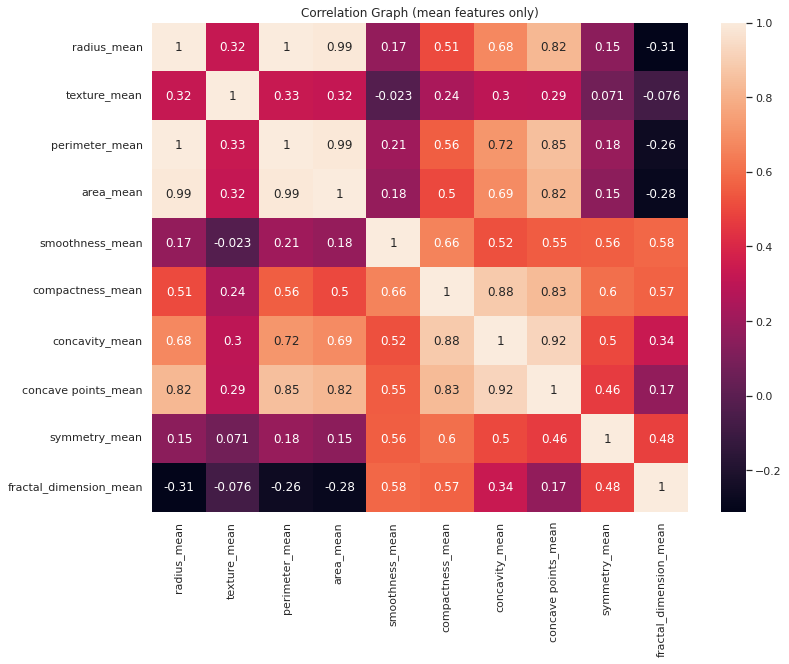

In [ ]:
mean_features = data.iloc[:, 1:12]

X = mean_features.drop(['diagnosis'], axis=1)
Y = mean_features['diagnosis']

plt.figure(figsize=(12, 9))
plt.title("Correlation Graph (mean features only)")
cols = list(X.columns)
sns.heatmap(data[cols].corr(), annot=True);

<ipython-input-33-8401b5b01bc8>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


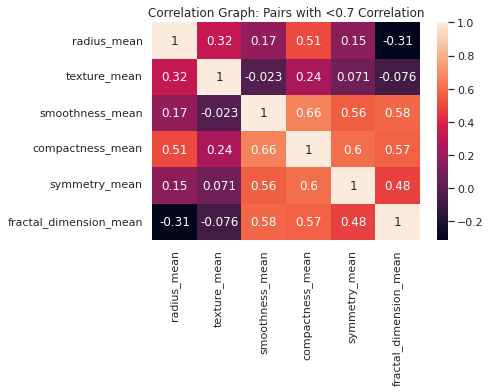

In [ ]:
corr_matrix = X.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Drop the highly correlated features
plt.title("Correlation Graph: Pairs with <0.7 Correlation")
feats = X.drop(to_drop, axis=1)
sns.heatmap(data[list(feats.columns)].corr(), annot=True);

#### AdaBoost Classifier

- `n_estimators` is the number of base learners (the base learner is a decision tree with 1 feature, known as a decision stump). 

- `learning_rate` is a factor that scales the contribution of each base learner before adding it the final ensemble. A small learning rate means that the classifier will take smaller steps towards the optimal solution and may require more iterations converge, however it may result in higher accuracy and lower variance. A large learning rate means that the classifier will take bigger steps towards the optimal solution and may require fewer iterations to converge, however it may result in lower accuracy and higher variance. It is necessary to tune this hyperparameter to prevent overfitting in the case that the weighted contribution of each base learner is too large. 

#### Grid Search CV

In [ ]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.model_selection import GridSearchCV

ada = AdaBoostClassifier()

# Define the hyperparameter grid
param_grid = {'n_estimators': np.arange(10, 210, 10),
              'learning_rate': [0.01, 0.1, 1, 1.5, 2.0]}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(ada, param_grid, cv=5)
grid_search.fit(feats, Y)

# Print the best hyperparameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 1.5, 'n_estimators': 100}


#### Validation Curve

sklearn `validation_curve` helps to visualize the effect of varying model hyperparameters on the performance of the model by plotting the model's performance on the training and validation sets as a function of the hyperparameter's value. Generates a plot to show model's performance on traaining and validation data, as a function of the hyperparameter values. Hyperparameters can be any parameter that affects training and model performance is measured via performance metrics such as accuracy.

We will look at how training accuracy and validation accuracy change as `n_estimators` and `learning_rate` varies.

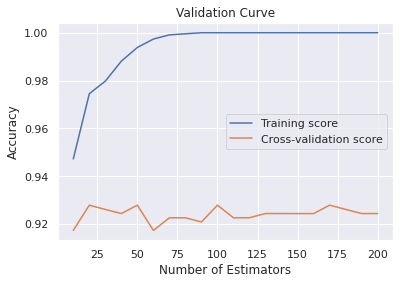

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import AdaBoostClassifier
import numpy as np

# plot validation curve to visualize effect of learning rate on model performance
train_scores, test_scores = validation_curve(ada, feats, Y, param_name='n_estimators', param_range=np.arange(10, 210, 10), cv=5, scoring="accuracy")

plt.figure()
plt.plot(np.arange(10, 210, 10), np.mean(train_scores, axis=1), label='Training score')
plt.plot(np.arange(10, 210, 10), np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Validation Curve')
plt.legend(loc='best')
plt.show()

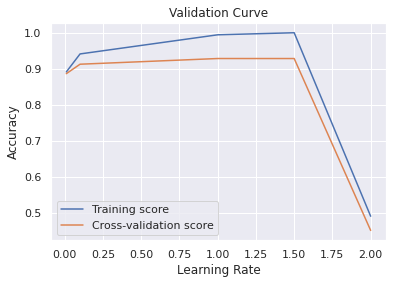

In [ ]:
# plot validation curve to visualize effect of learning rate on model performance
train_scores, test_scores = validation_curve(ada, feats, Y, param_name='learning_rate', param_range=[0.01, 0.1, 1, 1.5, 2.0], cv=5, scoring="accuracy")

plt.figure()
plt.plot([0.01, 0.1, 1, 1.5, 2.0], np.mean(train_scores, axis=1), label='Training score')
plt.plot([0.01, 0.1, 1, 1.5, 2.0], np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Validation Curve')
plt.legend(loc='best')
plt.show()

Training and cross-validationn accuracy both drop significantly once the learning rate exceeds 1.50. The peak of training and cross-validation accuracy is at a learning rate of 1.50. 

#### Train AdaBoost Classifier with Optimal Values for `n_estimators` and `learning_rate`

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Create an instance of AdaBoostClassifier
ada_boost = AdaBoostClassifier(n_estimators=100, learning_rate = 1.5, random_state=0)

# Perform cross-validation and compute the metrics
scoring = ['precision_macro', 'recall_macro', 'f1_macro', 'accuracy']
starttime= time.process_time()
scores = cross_validate(ada_boost, feats, Y, scoring=scoring, cv=10)
endtime= time.process_time()

totaltime = endtime-starttime
print(f"Total time taken by AdaBoost Classifier is" ,(totaltime),'seconds')

# Print the metrics
print("Precision:", np.mean(scores['test_precision_macro']))
print("Recall:", np.mean(scores['test_recall_macro']))
print("F1 score:", np.mean(scores['test_f1_macro']))
print("Accuracy:", np.mean(scores['test_accuracy']))

Precision: 0.9235824909838068
Recall: 0.9146356421356423
F1 score: 0.9167871732957975
Accuracy: 0.9225877192982456


## Further Possible Improvements to AdaBoost

#### Scaling Features

 The AdaBoost algorithm itself is based on decision trees, which can handle both continuous and categorical features with varying scales and ranges.

However, scaling features can still be beneficial for AdaBoost in some cases. For example, if the range of a feature is much larger than that of other features, then it could dominate the learning process and make the algorithm biased towards that feature. Scaling the features can help prevent this bias and ensure that each feature is treated equally.

In general, it's a good idea to experiment with both scaled and unscaled features and compare the performance of the AdaBoost classifier in each case. If scaling improves the performance, then it may be worth using. However, if scaling does not have a significant effect on performance, or if it harms performance, then it may be unnecessary to scale the features.

<Axes: title={'center': 'Correlation Graph (scaled mean features only)'}>

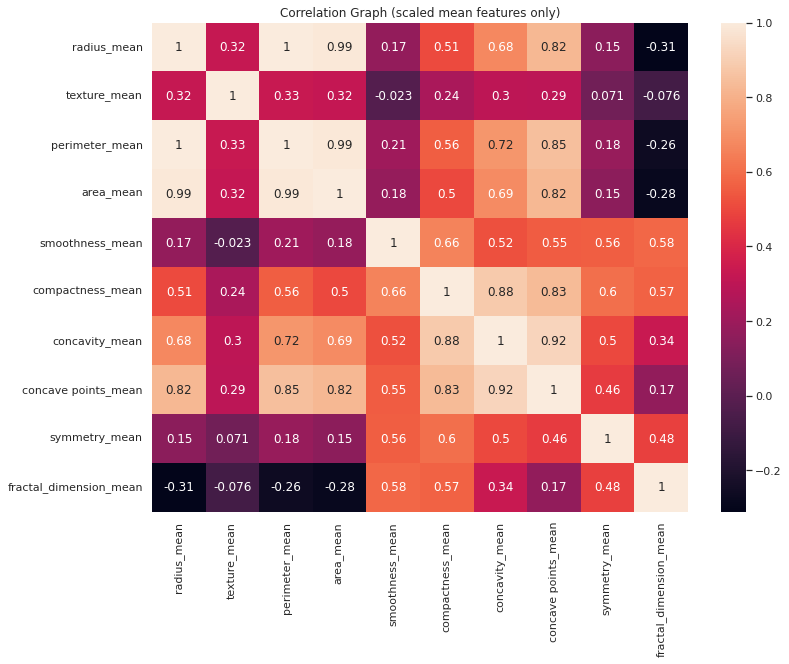

In [ ]:
mean_features = data.iloc[:, 1:12]

X = mean_features.drop(['diagnosis'], axis=1)
Y = mean_features['diagnosis']

# Scale mean features only
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

# Create new DF of scaled features
cols = list(X.columns)
X_scaled = pd.DataFrame(X_scaled, columns=cols)

# Correlation Matrix of scaled features
plt.figure(figsize=(12, 9))
plt.title("Correlation Graph (scaled mean features only)")
sns.heatmap(X_scaled.corr(), annot=True)

<ipython-input-39-7957dc56051d>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


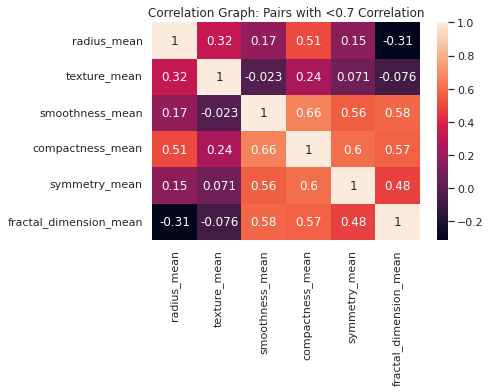

In [ ]:
corr_matrix = X_scaled.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Drop the highly correlated features
plt.title("Correlation Graph: Pairs with <0.7 Correlation")
X_scaled = X_scaled.drop(to_drop, axis=1)
sns.heatmap(data[list(X_scaled.columns)].corr(), annot=True);

#### Lasso Cross-Validation (Feature Selection)

Although scaling features did not affect correlations between features and therefore did not change which highly correlated features should be removed, we will still use the scaled features for Lasso Cross-Validation. 

Lasso Cross-Validation works by shrinking the coefficients of irrelevant features to zero, and keeping only the most important features - thereby reducing complexity and simplifying the model. It penalizes features with large magnitudes, so it is important that all features to be considered all share the same scale. Scaling the features ensures that they are all penalized equally based on their predictive power, and not based on their scale.

In [ ]:
from sklearn.linear_model import LassoCV

reg = LassoCV()
reg.fit(X_scaled, Y)


print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_scaled, Y))
coef = pd.Series(reg.coef_, index = X_scaled.columns)

Best alpha using built-in LassoCV: 0.000353
Best score using built-in LassoCV: 0.647625


In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")

Lasso picked 6 variables and eliminated the other 0 variables


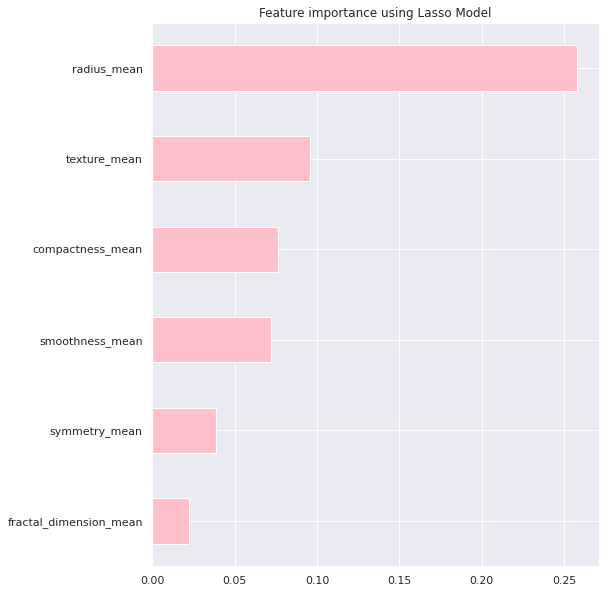

In [ ]:
imp_coef = coef.abs().sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh", color= 'pink')
plt.title("Feature importance using Lasso Model")
plt.show()

Lasso CV did not improve the performance of our model. It did not remove any features. A possible reason is because there are too few remaining features or too many highly correlated features. However, we know that because we removed highly correlated features prior to using Lasso CV, this is not the reason why. The more plausible reason is because there are too few features, so let's start out with all the original features (bigger set of features, instead of just the `mean_features`), scale them, remove the highly correlated features, conduct Lasso CV, then estimate the model's performance.

<ipython-input-43-ea89b2a7d373>:18: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


Best alpha using built-in LassoCV: 0.000353
Best score using built-in LassoCV: 0.695087
Lasso picked 10 variables and eliminated the other 0 variables


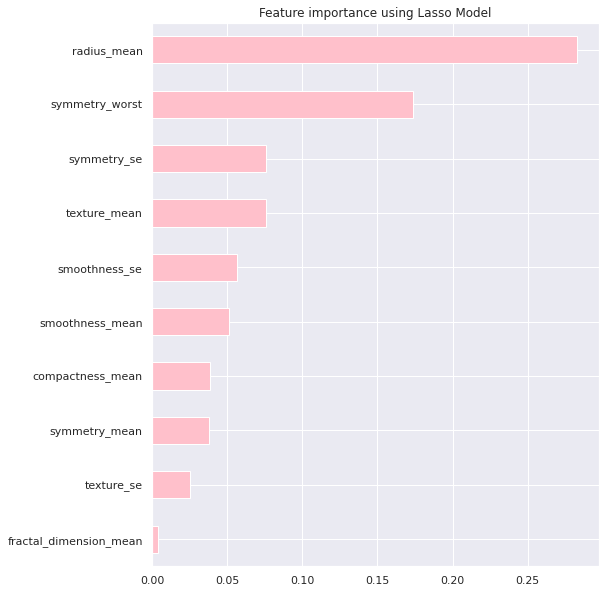

In [ ]:
all_feats = data.iloc[:, 2:]

X = all_feats
Y = data.loc[:, 'diagnosis']

# Scale *all* features
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

# Create new DF with scaled features
cols = list(X.columns)
X_scaled = pd.DataFrame(X_scaled, columns=cols)

# Correlation matrix of scaled features
corr_matrix = X_scaled.corr().abs()

# Drop the highly correlated features
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
X_scaled = X_scaled.drop(to_drop, axis=1)

# Conduct Lasso CV
reg = LassoCV()
reg.fit(X_scaled, Y)


print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_scaled, Y))
coef = pd.Series(reg.coef_, index = X_scaled.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")

imp_coef = coef.abs().sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh", color= 'pink')
plt.title("Feature importance using Lasso Model")
plt.show()

In [ ]:
ada = AdaBoostClassifier()

# Define the hyperparameter grid
param_grid = {'n_estimators': np.arange(10, 210, 10),
              'learning_rate': [0.01, 0.1, 1, 1.5, 2.0]}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(ada, param_grid, cv=5)
grid_search.fit(X_scaled, Y)

# Print the best hyperparameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 1.5, 'n_estimators': 80}


In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import AdaBoostClassifier
import numpy as np

# plot validation curve to visualize effect of learning rate on model performance
train_scores, test_scores = validation_curve(ada, X_scaled, Y, param_name='n_estimators', param_range=np.arange(10, 210, 10), cv=5, scoring="accuracy")

plt.figure()
plt.plot(np.arange(10, 210, 10), np.mean(train_scores, axis=1), label='Training score')
plt.plot(np.arange(10, 210, 10), np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Validation Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
# plot validation curve to visualize effect of learning rate on model performance
train_scores, test_scores = validation_curve(ada, X_scaled, Y, param_name='learning_rate', param_range=[0.01, 0.1, 1, 1.5, 2.0], cv=5, scoring="accuracy")

plt.figure()
plt.plot([0.01, 0.1, 1, 1.5, 2.0], np.mean(train_scores, axis=1), label='Training score')
plt.plot([0.01, 0.1, 1, 1.5, 2.0], np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Validation Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
# Create an instance of AdaBoostClassifier
ada_boost = AdaBoostClassifier(n_estimators=80, learning_rate = 1.5, random_state=0)

# Perform cross-validation and compute the metrics
scoring = ['precision_macro', 'recall_macro', 'f1_macro', 'accuracy']

starttime= time.process_time()
scores = cross_validate(ada_boost, X_scaled, Y, scoring=scoring, cv=10)
endtime= time.process_time()

totaltime = endtime-starttime
print(f"Total time taken by AdaBoost Classifier is" ,(totaltime),'seconds')

# Print the metrics
print("Precision:", np.mean(scores['test_precision_macro']))
print("Recall:", np.mean(scores['test_recall_macro']))
print("F1 score:", np.mean(scores['test_f1_macro']))
print("Accuracy:", np.mean(scores['test_accuracy']))

Precision: 0.9294028453440217
Recall: 0.91991341991342
F1 score: 0.9221017490257468
Accuracy: 0.9279135338345865


Even after considering all 30 features instead of just the 10 mean_features, our model performance improved by a little. Although there were 4 additional features (10 features total) in the more complex model, the training time didn't take much longer compared to when there  were 6 features. Precision, recall, F1 score, and accuracy all increased with little additional training time. 

Let's try to improve this model by varying the depth of base learners. 

In [ ]:
param_grid = {'base_estimator__max_depth': [1, 2, 3, 4, 5]} 
base_estimator = DecisionTreeClassifier()
adaboost = AdaBoostClassifier(base_estimator=base_estimator, learning_rate=1.5, n_estimators=80)
grid_search = GridSearchCV(adaboost, param_grid=param_grid, cv=5)
grid_search.fit(X_scaled, y)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import validation_curve

base_estimator = DecisionTreeClassifier()
adaboost = AdaBoostClassifier(base_estimator=base_estimator, learning_rate=1.5, n_estimators=80)

param_range = np.arange(1, 6)
train_scores, test_scores = validation_curve(adaboost, X_scaled, Y, param_name='base_estimator__max_depth', 
                                             param_range=param_range, cv=5, scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_scores_mean, label='Training score')
plt.plot(param_range, test_scores_mean, label='Cross-validation score')
plt.xlabel('Max depth of the decision tree')
plt.ylabel('Accuracy')
plt.title('Validation curve')
plt.legend()
plt.show()